# 1. Problem Framing

Business application is that the company identified a lot of wastage in the business. To reduce this we are determining when extra staff are needed and when they are not needed.

In [ ]:
from IPython.display import display
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO 
from subprocess import call
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report 
from deslib.static.stacked import StackedClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# 2. Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('H2.csv')

In [4]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## 2.1. Calculating Cost Function

In [5]:
import sklearn

In [6]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.3.


In [7]:
len(df)

79330

In [8]:
df.IsCanceled.value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

# 3. Preprocessing

In [9]:
# df.hist(bins=30, figsize=(16,16))
# plt.show()

In [10]:
len(df)

79330

In [11]:
df.isna().sum().sum()

28

In [12]:
df = df.dropna()

In [13]:
df.isna().sum().sum()

0

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
len(df)

79302

In [16]:
# df.loc[df['Agent'] == '       NULL']

In [17]:
df.drop(columns=['ReservationStatusDate', 'ReservationStatus'], inplace=True)

In [18]:
len(df)

79302

In [19]:
y = df[['IsCanceled']]
X = df.drop(columns=['IsCanceled','ArrivalDateYear'])

In [20]:
num_features = ['LeadTime',
            'StaysInWeekendNights',
            'StaysInWeekNights',
            'Adults',
            'Children',
            'Babies',
            'PreviousCancellations',
            'PreviousBookingsNotCanceled',
            'BookingChanges',
            'DaysInWaitingList',
            'ADR',
            'RequiredCarParkingSpaces',
            'TotalOfSpecialRequests']

df_num = X[num_features]

df_cat = X.drop(columns=num_features)

cat_features = list(df_cat.columns)

In [21]:
len(X)

79302

In [22]:
len(y)

79302

In [23]:
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

In [24]:
X.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,...,Company_ 486,Company_ 489,Company_ 491,Company_ 492,Company_ 494,Company_ 497,Company_ NULL,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,6,0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,88,0,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,65,0,4,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,92,2,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,100,0,2,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
len(X)

79302

In [26]:
len(X)

79302

# 4. Modelling

## 4.1. Modelling Functions

In [27]:
from sklearn.metrics import roc_auc_score
def scores(model,X_train,X_val,y_train,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'test:',round(val,2))

In [28]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [29]:
from sklearn.metrics import roc_curve
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [30]:
def opt_plots(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
#     return opt

## 4.2. Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=50)

In [33]:
y_train.isnull().sum().sum()

0

## 4.3. Model Creation

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate

In [35]:
skf = StratifiedKFold(n_splits=3,random_state=50)

In [36]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

log_cv = cross_validate(log_reg, 
                        X_train, 
                        y_train, 
                        cv=skf, 
                        scoring='roc_auc', 
                        return_train_score=True,
                        n_jobs=-1)

In [ ]:
log_cv

In [ ]:
param_grid = {'penalty':['l2','l1'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

opt_model = GridSearchCV(log_reg, 
                            param_grid, 
                            cv=skf, 
                            scoring='roc_auc', 
                            return_train_score=True, 
                            n_jobs=-1, 
                            verbose=False)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train, X_val, y_train, y_val)
print(opt_model.best_params_)
# opt_plots(opt_model)

In [ ]:
best_model

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# %%time
param_grid = {'max_depth':range(150,250+1,10),'min_samples_leaf':np.arange(30,51,3)}

opt_model = GridSearchCV(dtree_clf, 
                               param_grid, 
                               cv=skf, 
                               scoring='roc_auc', 
                               return_train_score=True, 
                               n_jobs=-1, 
                               verbose=False)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train, X_val, y_train, y_val)
print(opt_model.best_params_)
opt_plots(opt_model)

In [ ]:
roc_plot(best_model, X_train, y_train, X_val, y_val)

# Modelling Class

In [47]:
class Classification():
    
    def __init__(self, model, X_train, X_val, y_train, y_val):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        
        if self.model == 'Logistic Regression':
                self.instantiate = LogisticRegression(fit_intercept=False)
        elif self.model == 'Decision Tree':
                self.instantiate = DecisionTreeClassifier(random_state=42)
        elif self.model == 'Random Forest':
                self.instantiate = RandomForestClassifier(n_estimators=10, 
                                                          n_jobs=-1,
                                                          random_state=42)
#         elif self.instantiate == "SVM":
#             self.instantiate = SVC(probability=True)
            
# SCORE FUNCTION -------------------------------------------------------------
        
    def scores(self, model, X_train, X_val, y_train, y_val):
        
        train_prob = model.predict_proba(X_train)[:,1]
        val_prob = model.predict_proba(X_val)[:,1]
        
        train_auc = roc_auc_score(y_train, train_prob)
        val_auc = roc_auc_score(y_val, val_prob)
        
        self.train_auc = train_auc
        self.val_auc = val_auc
        
        self.scores_table = pd.DataFrame()
        
        self.scores_table["Model"] = [self.model]
        self.scores_table["Train AUC"] = [self.train_auc]
        self.scores_table["Validation AUC"] = [self.val_auc]
        
        return self.scores_table
    
# THRESHOLD ANNOTATION -------------------------------------------------------


    def annot(fpr,tpr,thr):
        k=0
        for i,j in zip(fpr,tpr):
            if k % 100 == 0:
                plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
            k+=1
            
# ROC PLOT FUNCTION ----------------------------------------------------------

    def roc_plot(model, X_train, X_val, y_train, y_val):
        train_prob = model.predict_proba(X_train)[:,1]
        val_prob = model.predict_proba(X_val)[:,1]
        plt.figure(figsize=(7,7))
        for data in [[y_train, train_prob],[y_val, val_prob]]:
            fpr, tpr, thresh = roc_curve(data[0], data[1])
            plt.plot(fpr, tpr)
        Classification.annot(fpr, tpr, thresh)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.ylabel('TPR (power)')
        plt.xlabel('FPR (alpha)')
        plt.legend(['train','val'])
        plt.show()
        
# GET SCORES FUNCTION --------------------------------------------------------

    def get_scores(self, param_grid, cv_type):
        reg = self.instantiate
        fit_reg = reg.fit(self.X_train, self.y_train)
        opt_model = GridSearchCV(fit_reg,
                                 param_grid,
                                 cv=cv_type,
                                 scoring='roc_auc',
                                 return_train_score=True,
                                 n_jobs=-1)
        self.opt_model = opt_model.fit(self.X_train, self.y_train) 
        self.best_model = opt_model.best_estimator_
        self.scores = Classification.scores(self,
                                            self.best_model,
                                            self.X_train,
                                            self.X_val,
                                            self.y_train,
                                            self.y_val)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        print("The best hyperparameters are: ", self.best_params,'\n')
        self.roc_plot = Classification.roc_plot(self.best_model,
                                                self.X_train,
                                                self.X_val,
                                                self.y_train,
                                                self.y_val)
        self.y_predicted = opt_model.predict(self.X_val)
        
# OPTIMUM PLOT FUCNTION ------------------------------------------------------

    def opt_plots(self):
        
        if self.model == "Decision Tree" or self.model == "Random Forest":
            opt = pd.DataFrame(self.opt_model.cv_results_)
            cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
            params = pd.DataFrame(list(opt.params))
            opt = pd.concat([params, opt[cols]], axis=1, sort=False)
            
            plt.figure(figsize=[15,4])
            plt.subplot(121)
            sns.heatmap(pd.pivot_table(opt,
                                       index='max_depth',
                                       columns='min_samples_leaf',
                                       values='mean_train_score')*100)
            plt.title('ROC_AUC - Training')
            plt.subplot(122)
            sns.heatmap(pd.pivot_table(opt,
                                       index='max_depth',
                                       columns='min_samples_leaf',
                                       values='mean_test_score')*100)
            plt.title('ROC_AUC - Validation')
            
        else:
            print("This model does not have an optimum hyperparameter plot!")
        
# CONFUSION MATRIX FUNCTION --------------------------------------------------

    def conf_matrix(y_true, y_pred):
        
        cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
        
        for i, label in enumerate(y_true):
            
            pred = y_pred[i]
            if label == 1:
                if label == pred:
                    cm['TP'] += 1
                else:
                    cm['FN'] += 1
            else:
                if label == pred:
                    cm['TN'] += 1
                else:
                    cm['FP'] += 1
                
        return cm
        
# DISPLAY PRETTY CONFUSION MATRIX FUNCTION -----------------------------------

    def pretty_conf_matrix(self):
        
        Classification.conf_matrix(self.y_val, self.y_predicted)
        cnf_matrix = confusion_matrix(self.y_val, self.y_predicted)
        
        plt.figure(figsize=(6,6))
        plt.imshow(cnf_matrix, cmap=plt.cm.Greens)
        
        plt.title('Confusion Matrix')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
        class_names = set(y)
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        thresh = cnf_matrix.max() / 2.
        for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
                plt.text(j, i, cnf_matrix[i, j],
                         horizontalalignment='center')
        plt.colorbar

# PLOT DECISION TREE FUCNTION ------------------------------------------------

    def plot_dtree(self):
        
        if self.model == "Decision Tree":
            
            dot_data = StringIO()
            export_graphviz(self.best_model, 
                            out_file=dot_data, 
                            filled=True,
                            rounded=True,
                            special_characters=True)
            graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
            graph.write_png(f'{self.model}.png')
            image = mpimg.imread(f'{self.model}.png')
            plt.figure(figsize=(50,50))
            plt.imshow(image)
            plt.show()
            
        else:
            
            print("This model does not have a decision tree plot!")
        

In [44]:
logistic_regression = Classification('Logistic Regression', X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Logistic Regression,0.910548,0.910223


The best hyperparameters are:  {} 



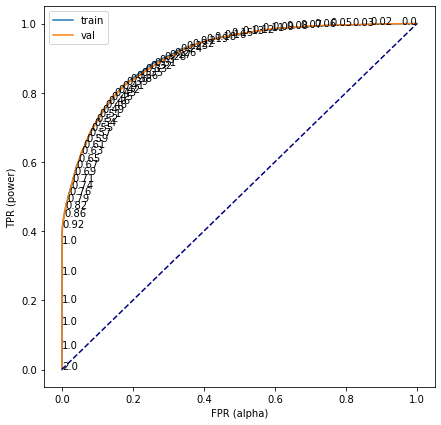

In [45]:
param_grid = {}
logistic_regression.get_scores(param_grid, skf)

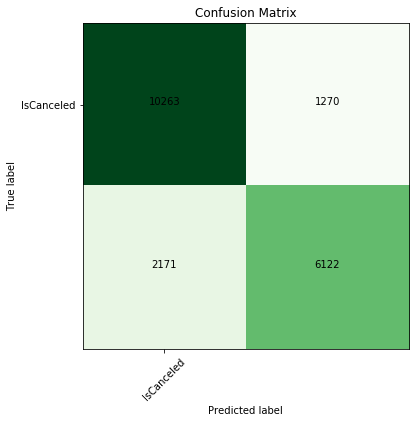

In [46]:
logistic_regression.pretty_conf_matrix()

In [56]:
param_grid = {'max_depth':range(50,100,10), 'min_samples_leaf':range(38,41,1)}

decision_tree = Classification("Decision Tree", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Decision Tree,0.944257,0.92992


The best hyperparameters are:  {'max_depth': 50, 'min_samples_leaf': 39} 



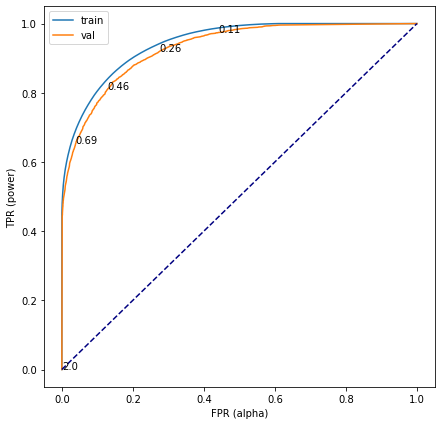

In [57]:
decision_tree.get_scores(param_grid, skf)

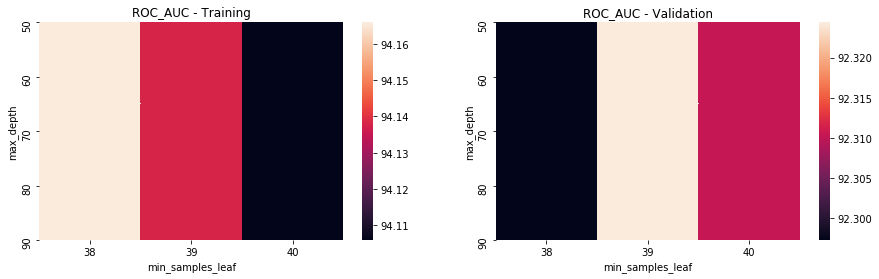

In [58]:
decision_tree.opt_plots()

In [66]:
param_grid = {'max_depth':[10,50,100,200,500], 'min_samples_leaf':[10,50,100,200,500]}

random_forest = Classification("Random Forest", X_train, X_val, y_train, y_val)

,Model,Train AUC,Validation AUC
0,Random Forest,0.937745,0.931156


The best hyperparameters are:  {'max_depth': 50, 'min_samples_leaf': 10} 



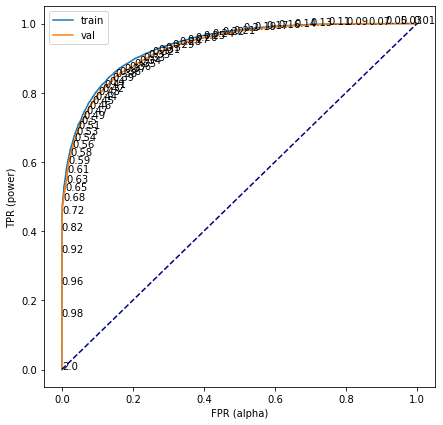

In [67]:
random_forest.get_scores(param_grid, skf)

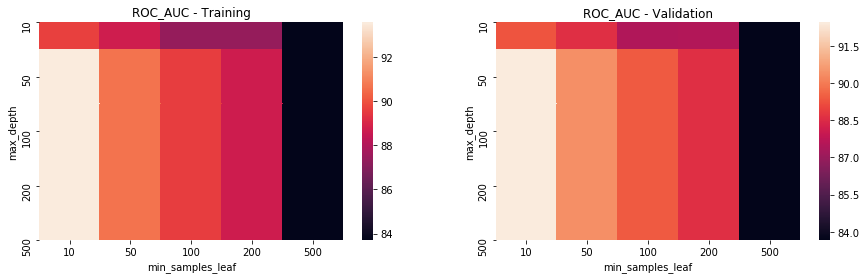

In [68]:
random_forest.opt_plots()